In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:35<00:00, 62.2MB/s]
100% 2.29G/2.29G [00:35<00:00, 69.7MB/s]


In [0]:
from zipfile import *

zip_ref = ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [17]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/test',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/train',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 500,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 125)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Epoch 1/10
500/500 [==============================] - 173s 346ms/step - loss: 0.3458 - acc: 0.8440 - val_loss: 0.2403 - val_acc: 0.8998
Epoch 2/10
500/500 [==============================] - 169s 339ms/step - loss: 0.2221 - acc: 0.9076 - val_loss: 0.2292 - val_acc: 0.9095
Epoch 3/10
500/500 [==============================] - 169s 338ms/step - loss: 0.1674 - acc: 0.9340 - val_loss: 0.3109 - val_acc: 0.8862
Epoch 4/10
500/500 [==============================] - 169s 337ms/step - loss: 0.1394 - acc: 0.9437 - val_loss: 0.3400 - val_acc: 0.8925
Epoch 5/10
500/500 [==============================] - 169s 337ms/step - loss: 0.1155 - acc: 0.9551 - val_loss: 0.4800 - val_acc: 0.8732
Epoch 6/10
500/500 [==============================] - 168s 337ms/step - loss: 0.0935 - acc: 0.9639 - val_loss: 0.5226 - val_acc: 0.8592
Epoch 7/10
500/500 [==============================] - 167s 334ms/step - loss: 0.0748 - acc: 0.9711 - 

In [0]:
classifier.save('pneumonia_pred_new.h5')

[[1]]


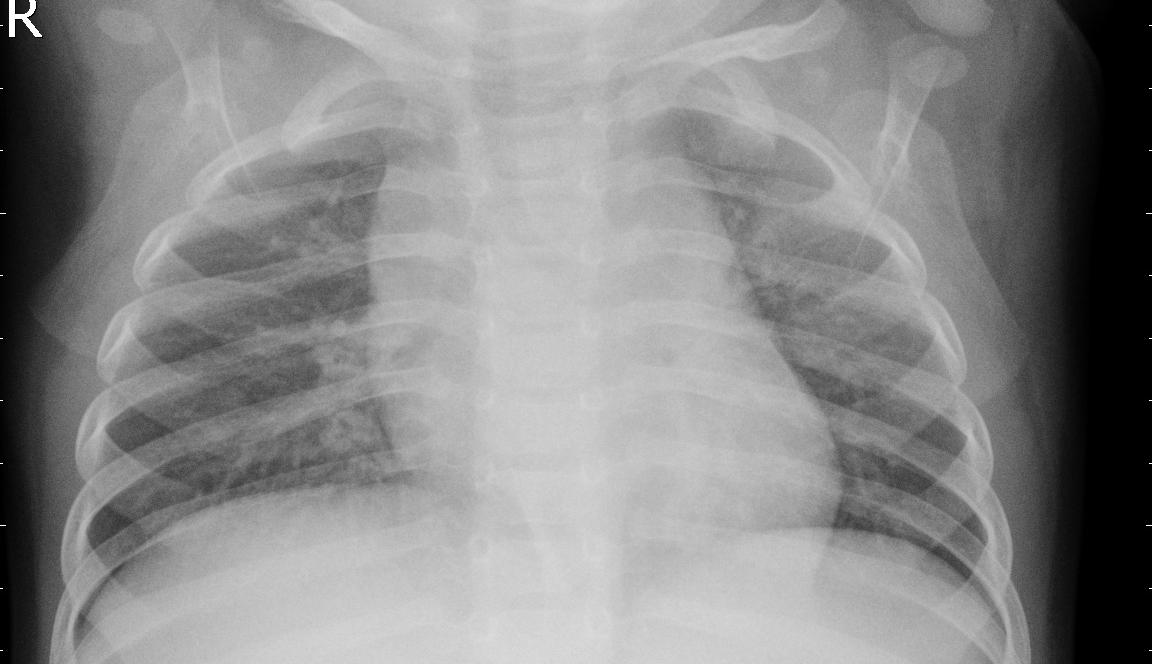

------------PREDICTION--------------

PNEUMONIA TEST RESULT :  POSITIVE
The probability of the test being POSITIVE is 100% 
------------------------------------


In [19]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('pneumonia_pred.h5')
'''
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
'''
imageee = 'chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'
img = cv2.imread(imageee)
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)
probabilities = model.predict_proba(img)
print(classes)

from google.colab.patches import cv2_imshow
cvimg = cv2.imread(imageee)
cv2_imshow(cvimg)
if classes == [[1]]:
  pred = 'POSITIVE'
else:
  pred = 'NEGATIVE'
  probabilities = 1 - probabilities



print("------------PREDICTION--------------")
print()
print("PNEUMONIA TEST RESULT : ",pred)
print('The probability of the test being {} is {}% '.format(pred,int(probabilities*100)))
print("------------------------------------")